In [18]:
from TwoStepRidge import TwoStepRidgeRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mse = lambda Y, P : np.mean((Y - P)**2)

Generate some random data

In [12]:
n_u, n_v = 250, 500

# features
X_u = np.random.randn(n_u, n_v)
X_v = np.random.rand(n_v, n_v)

# kernels

K_u = X_u.dot(X_u.T)
K_v = X_v.dot(X_v.T)

# parameters
A = np.random.randn(10, 100)

Y = X_u[:,:10].dot(A).dot(X_v[:,:100].T) + np.random.randn(n_u, n_v)

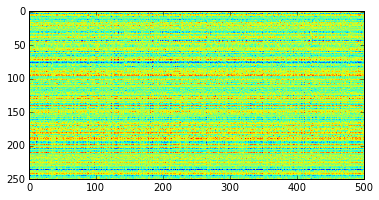

In [11]:
plt.imshow(Y, interpolation='nearest')

Make a two-step RLS model

In [26]:
reg_u, reg_v = (1, 1)

two_step_model = TwoStepRidgeRegression(Y, K_u, K_v)
two_step_model.train_model((reg_u, reg_v))

In [27]:
# LOOCV Setting A

LOOV_A = two_step_model.lo_setting_A()

# mse
print('MSE Setting {} : {}'.format('A', mse(Y, LOOV_A)))

MSE Setting A : 9.84486884841


In [28]:
# LOOCV Setting B (rows)

LOOV_B = two_step_model.lo_setting_B()

# mse
print('MSE Setting {} : {}'.format('B', mse(Y, LOOV_B)))

MSE Setting B : 233.097832032


In [29]:
# LOOCV Setting C (columns)

LOOV_C = two_step_model.lo_setting_C()

# mse
print('MSE Setting {} : {}'.format('C', mse(Y, LOOV_C)))

MSE Setting C : 9.81731619603


In [30]:
# LOOCV Setting D (both)

LOOV_D = two_step_model.lo_setting_D()

# mse
print('MSE Setting {} : {}'.format('D', mse(Y, LOOV_D)))

MSE Setting D : 237.810111135
